# Street network figure-ground diagrams, à la Allan Jacobs's *Great Streets*

Use OSMnx to download square-mile city street networks and visualize them like Nolli maps.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx/tree/master/examples)

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

## Part I: create diagrams for 4 lat-long points

In [2]:
dist = 805 #one half mile converted to meters

# create a list of place names, center lat-long points, and network types
places = [['sf', (37.793897, -122.402189), 'drive_service'],
          ['portland', (45.517309, -122.682138), 'drive_service'],
          ['irvine', (33.694981, -117.841375), 'drive_service'],
          ['rome', (41.901336, 12.471831), 'all'],
          ['nyc', (40.757920, -73.983393), 'drive_service'],
          ['paris', (48.873702, 2.294136), 'drive']]

In [3]:
for name, point, nt in places:
    print(name, point)
    
    # get the network within 1/2 mile north, south, east, and west of the point, then project to UTM
    G = ox.graph_from_point(point, distance=dist, distance_type='bbox', network_type=nt, truncate_by_edge=True)
    G = ox.project_graph(G)
    
    # ascribe street widths in pixels according to edge type
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 1.5
        elif data['highway'] in ['motorway']:
            width = 6
        else:
            width = 4
        ew.append(width)
    
    # create the plot's bounding box in meters to limit the plot to the square mile bounding box requested
    # this is only necessary when truncate_by_edge=True to prevent display of nodes/edges that extend beyond bounding box
    bbox_proj = ox.bbox_from_point(point, dist, project_utm=True)
    
    # plot the graph and save it to disk
    fig, ax = ox.plot_graph(G, bbox=bbox_proj, fig_height=8, margin=0, node_size=0, 
                            edge_linewidth=ew, edge_color='w', bgcolor='#333333', 
                            show=False, save=True, filename='gs_{}'.format(name))

sf (37.793897, -122.402189)
portland (45.517309, -122.682138)
irvine (33.694981, -117.841375)
rome (41.901336, 12.471831)
nyc (40.75792, -73.983393)
paris (48.873702, 2.294136)


## Part II: Create diagrams for any city, just by passing in a place name

In [4]:
# configure the image display
img_folder = 'images'
size = 500

In [5]:
# adapt the code above into a simple function that takes an address
def great_streets(address, dist=805, network_type='drive_service'):
    G, point = ox.graph_from_address(address, distance=dist, distance_type='bbox', network_type=network_type, 
                          truncate_by_edge=True, return_coords=True)
    G = ox.project_graph(G)
    ew = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if data['highway'] in ['footway', 'steps', 'pedestrian', 'service', 'footway', 'path', 'track']:
            width = 1.5
        elif data['highway'] in ['motorway']:
            width = 6
        else:
            width = 4
        ew.append(width)
    bbox_proj = ox.bbox_from_point(point, dist, project_utm=True)
    filename = 'gs_{}_{}'.format(address, network_type)
    fig, ax = ox.plot_graph(G, bbox=bbox_proj, fig_height=8, margin=0, node_size=0, 
                            edge_linewidth=ew, edge_color='w', bgcolor='#333333', 
                            show=False, save=True, filename=filename)
    return filename

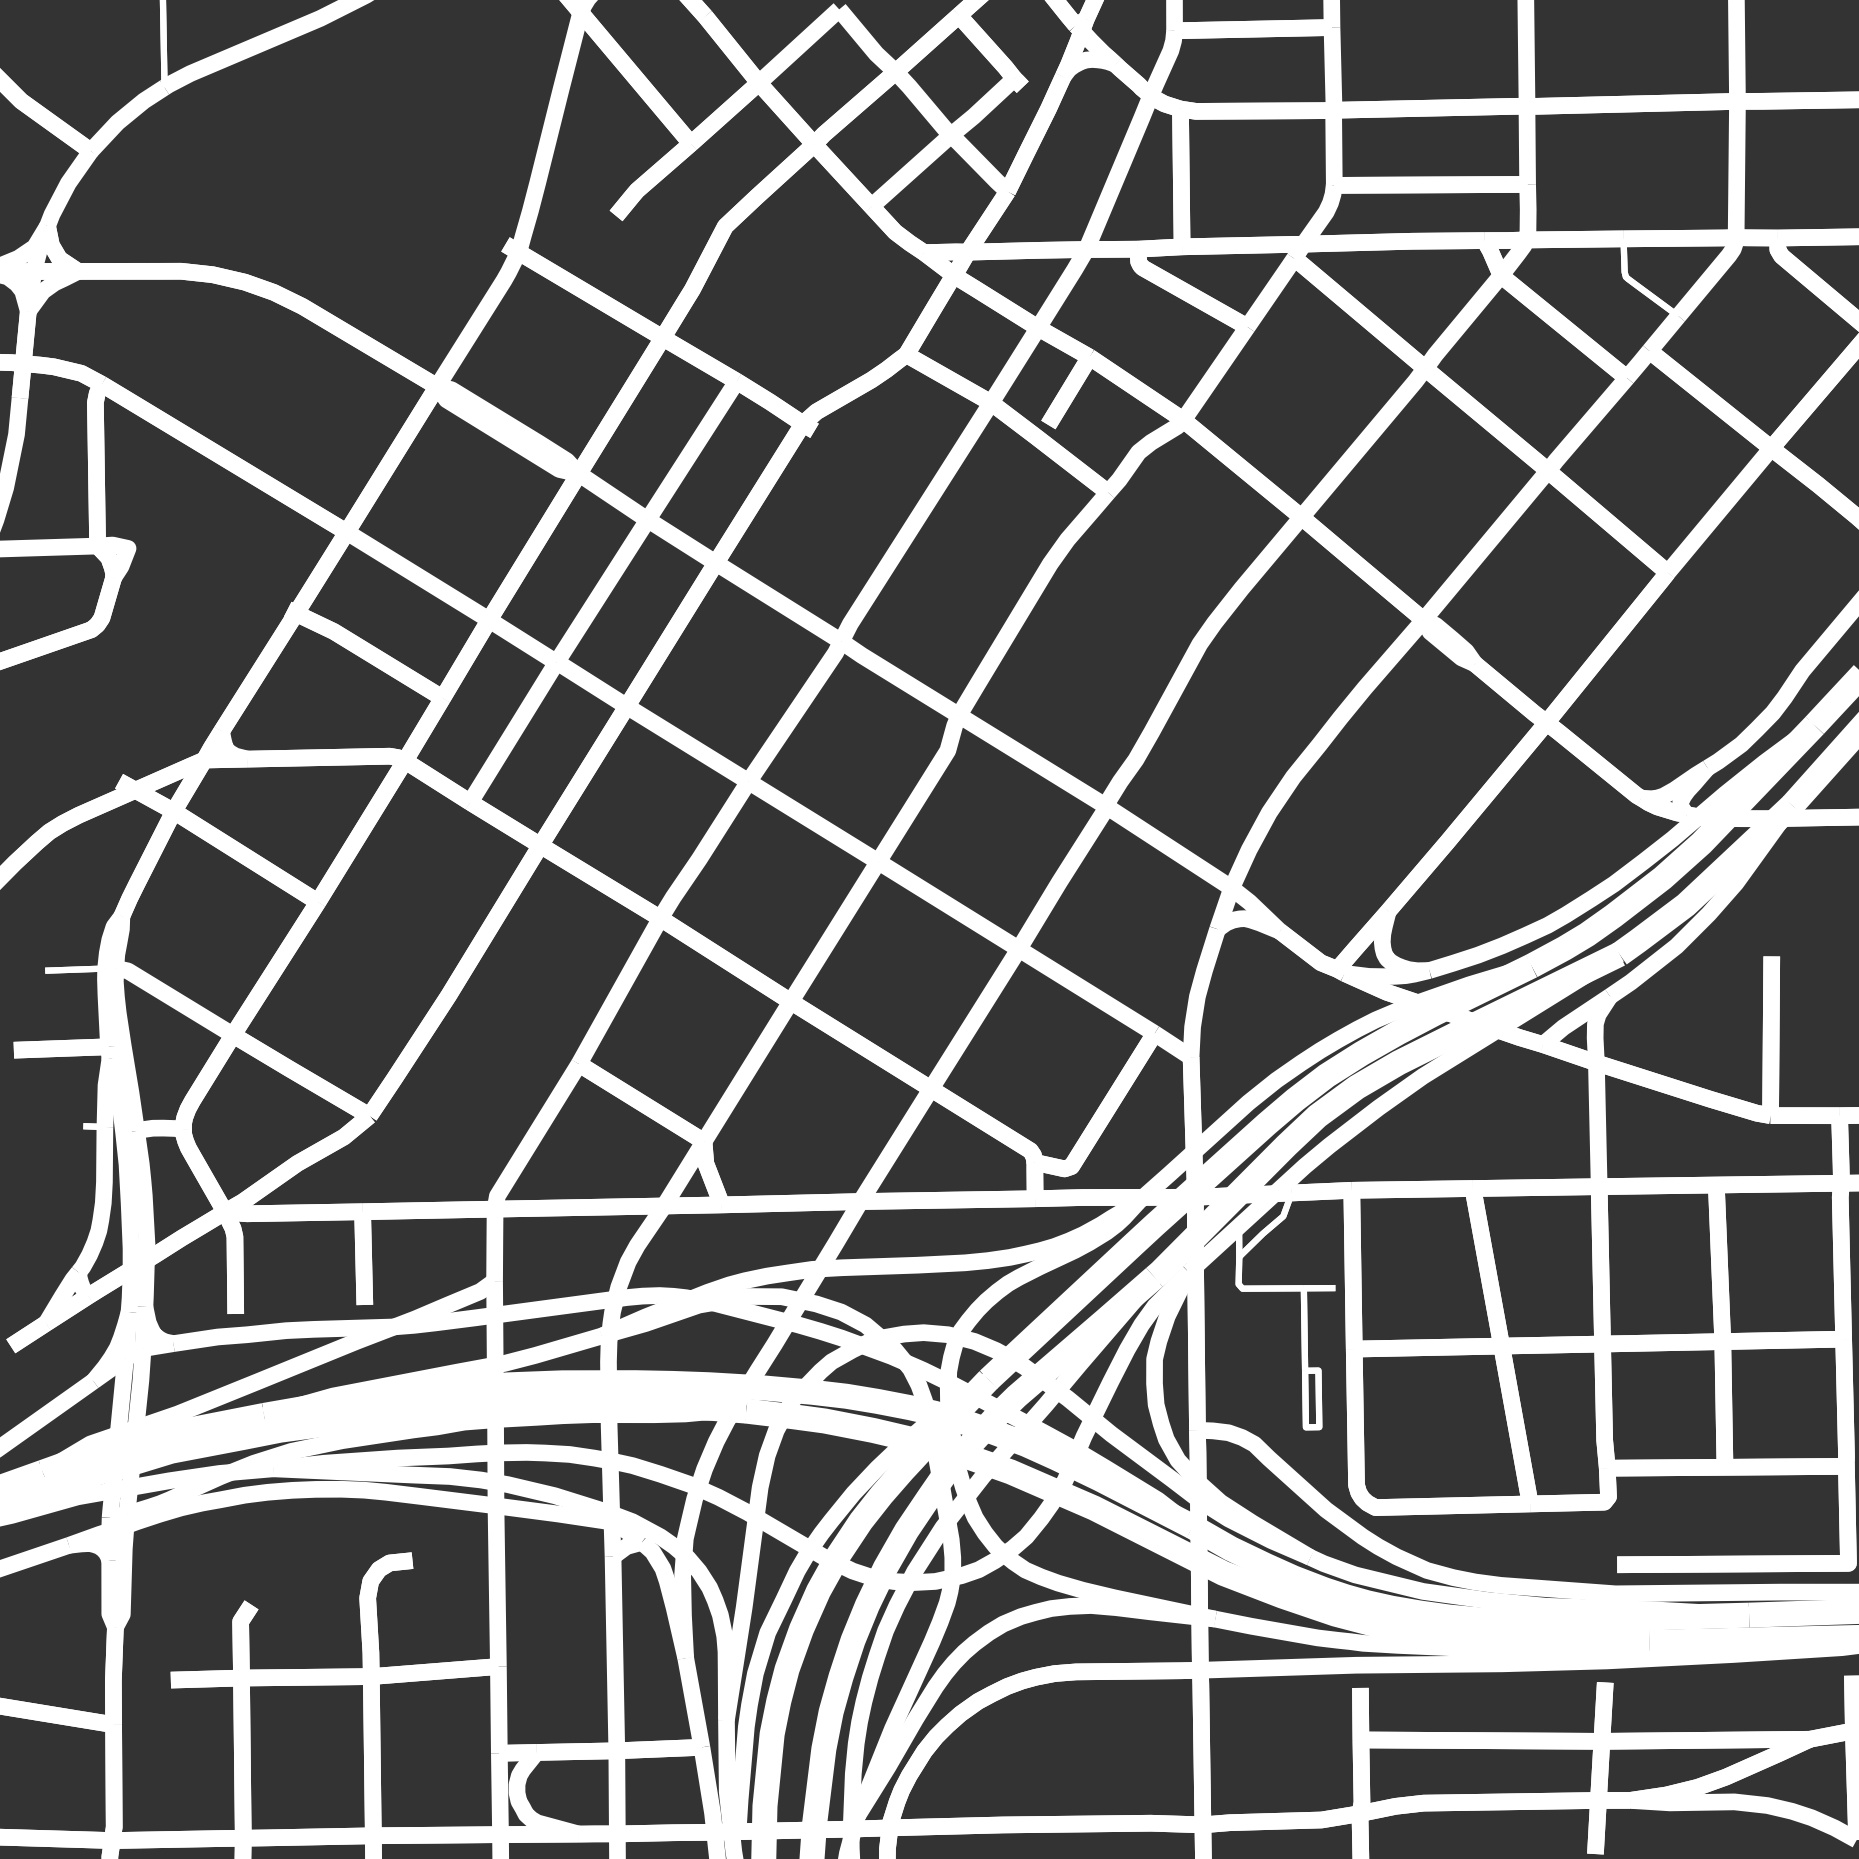

In [6]:
filename = great_streets('Atlanta, Georgia, USA')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

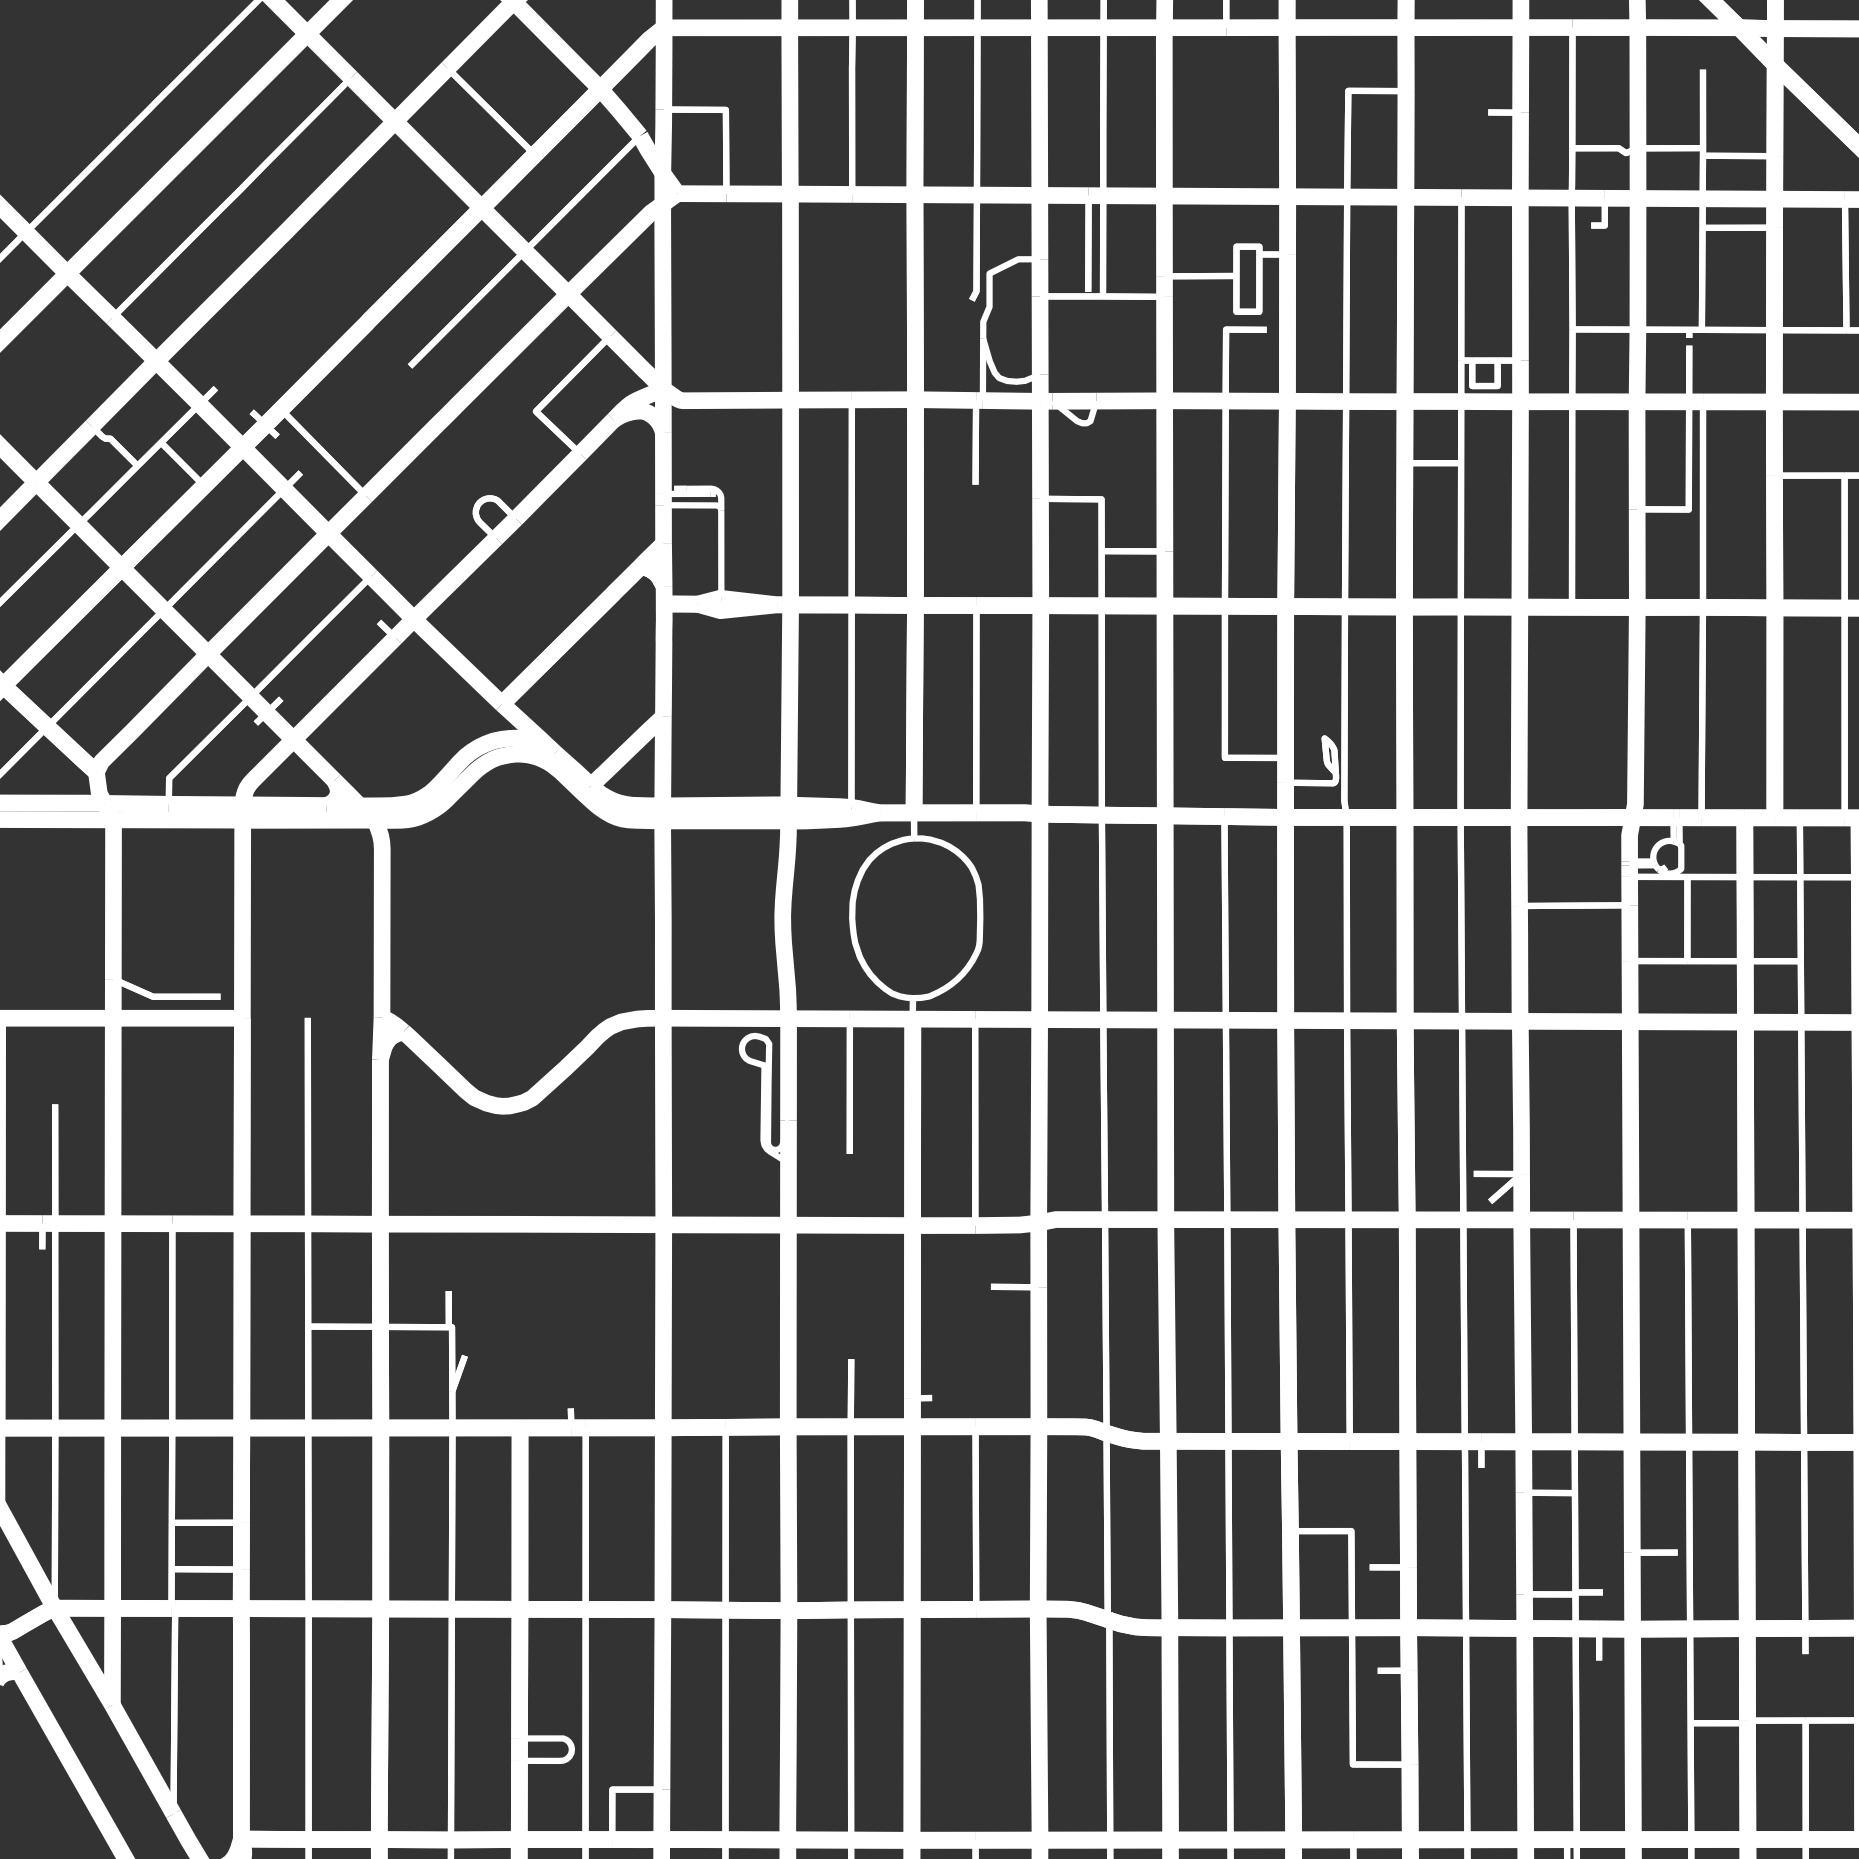

In [7]:
filename = great_streets('Denver, Colorado, USA')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

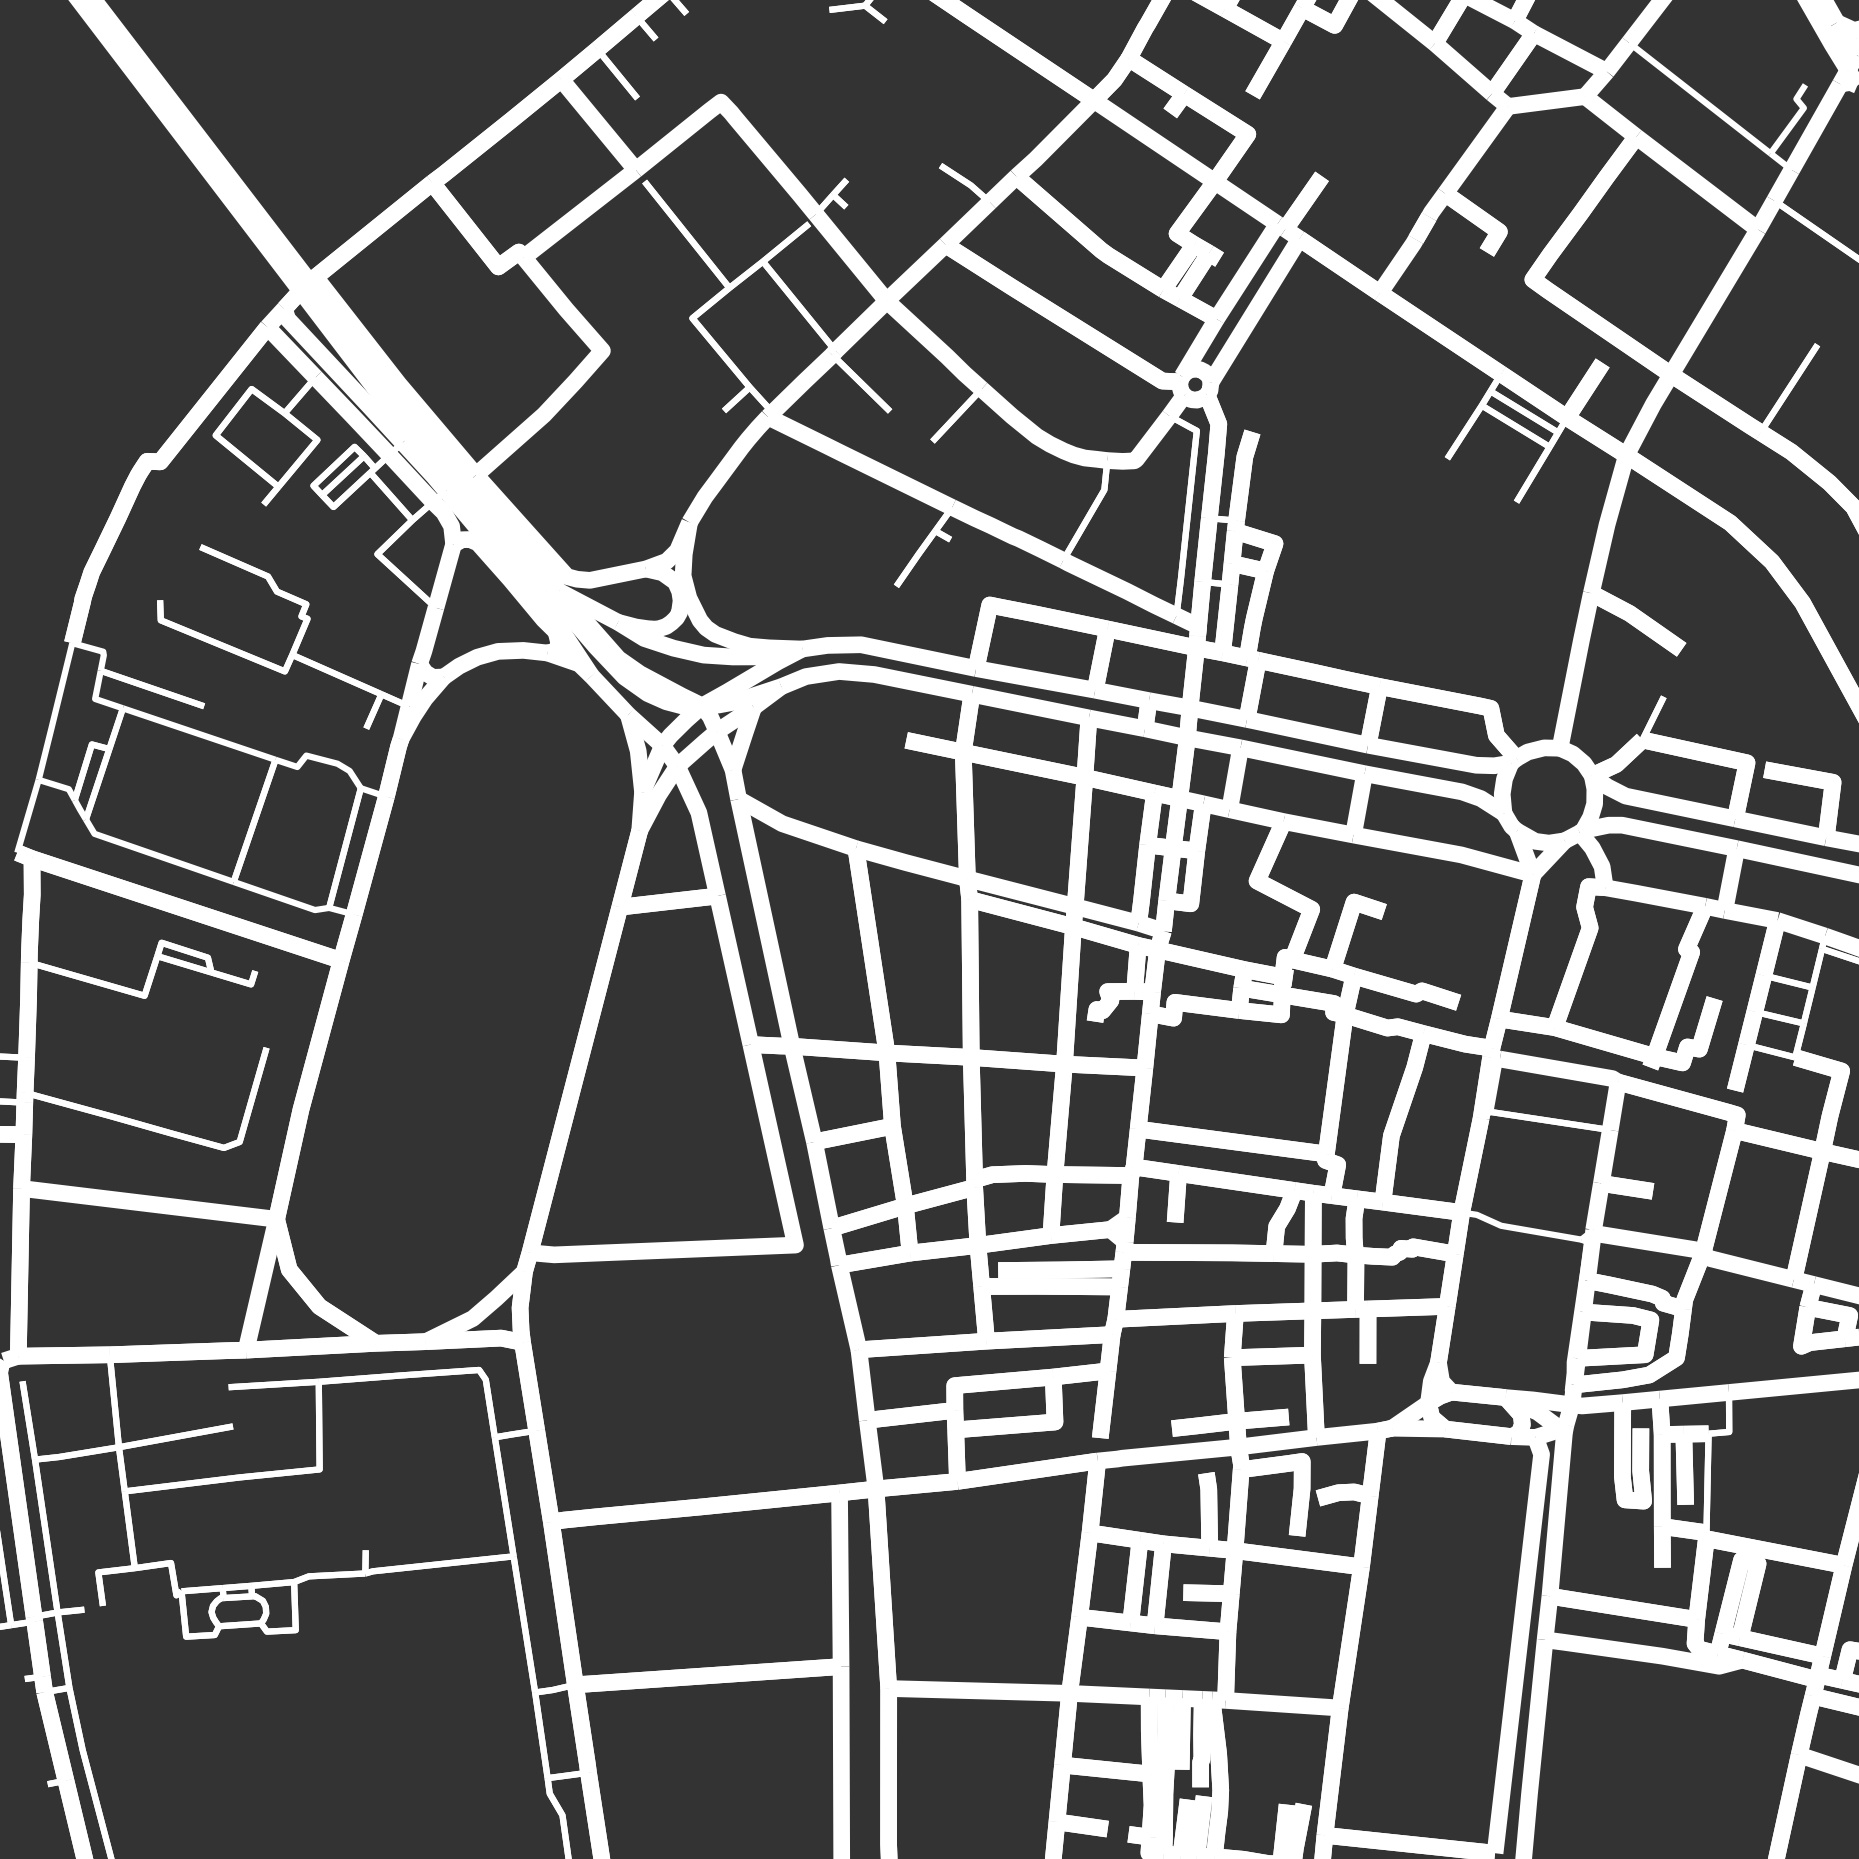

In [8]:
filename = great_streets('Phra Nakhon, Bangkok, Thailand')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

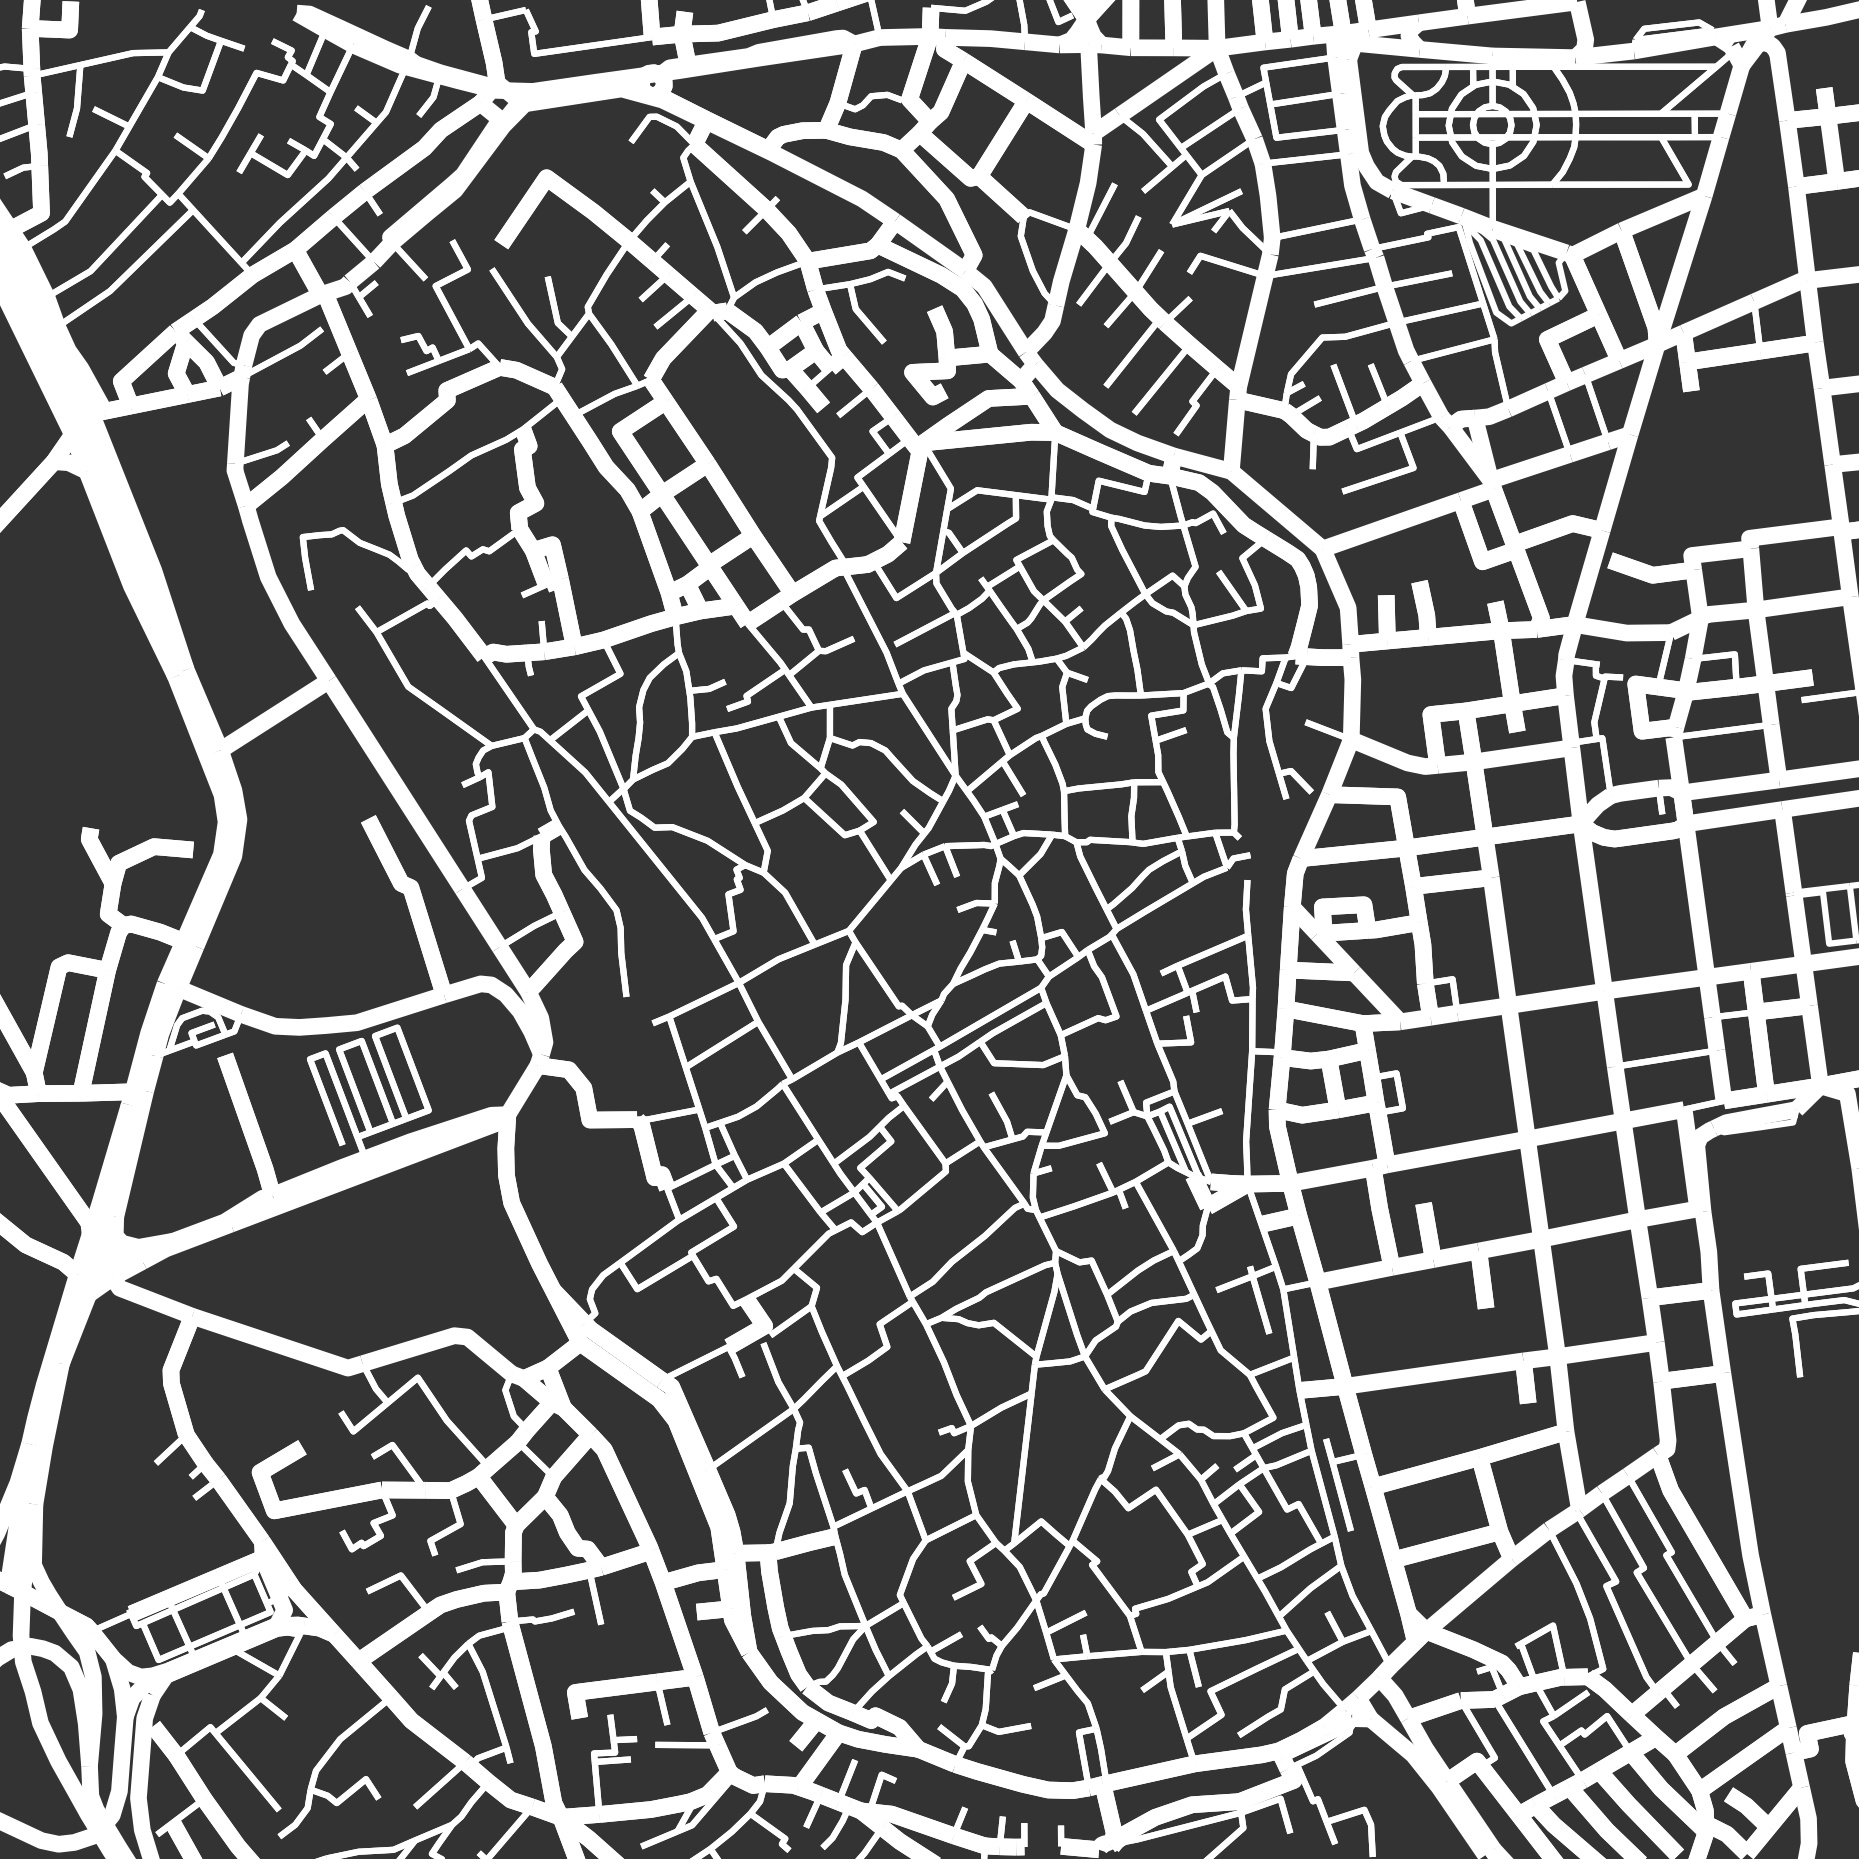

In [9]:
filename = great_streets('Medina, Tunis, Tunisia', network_type='all')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

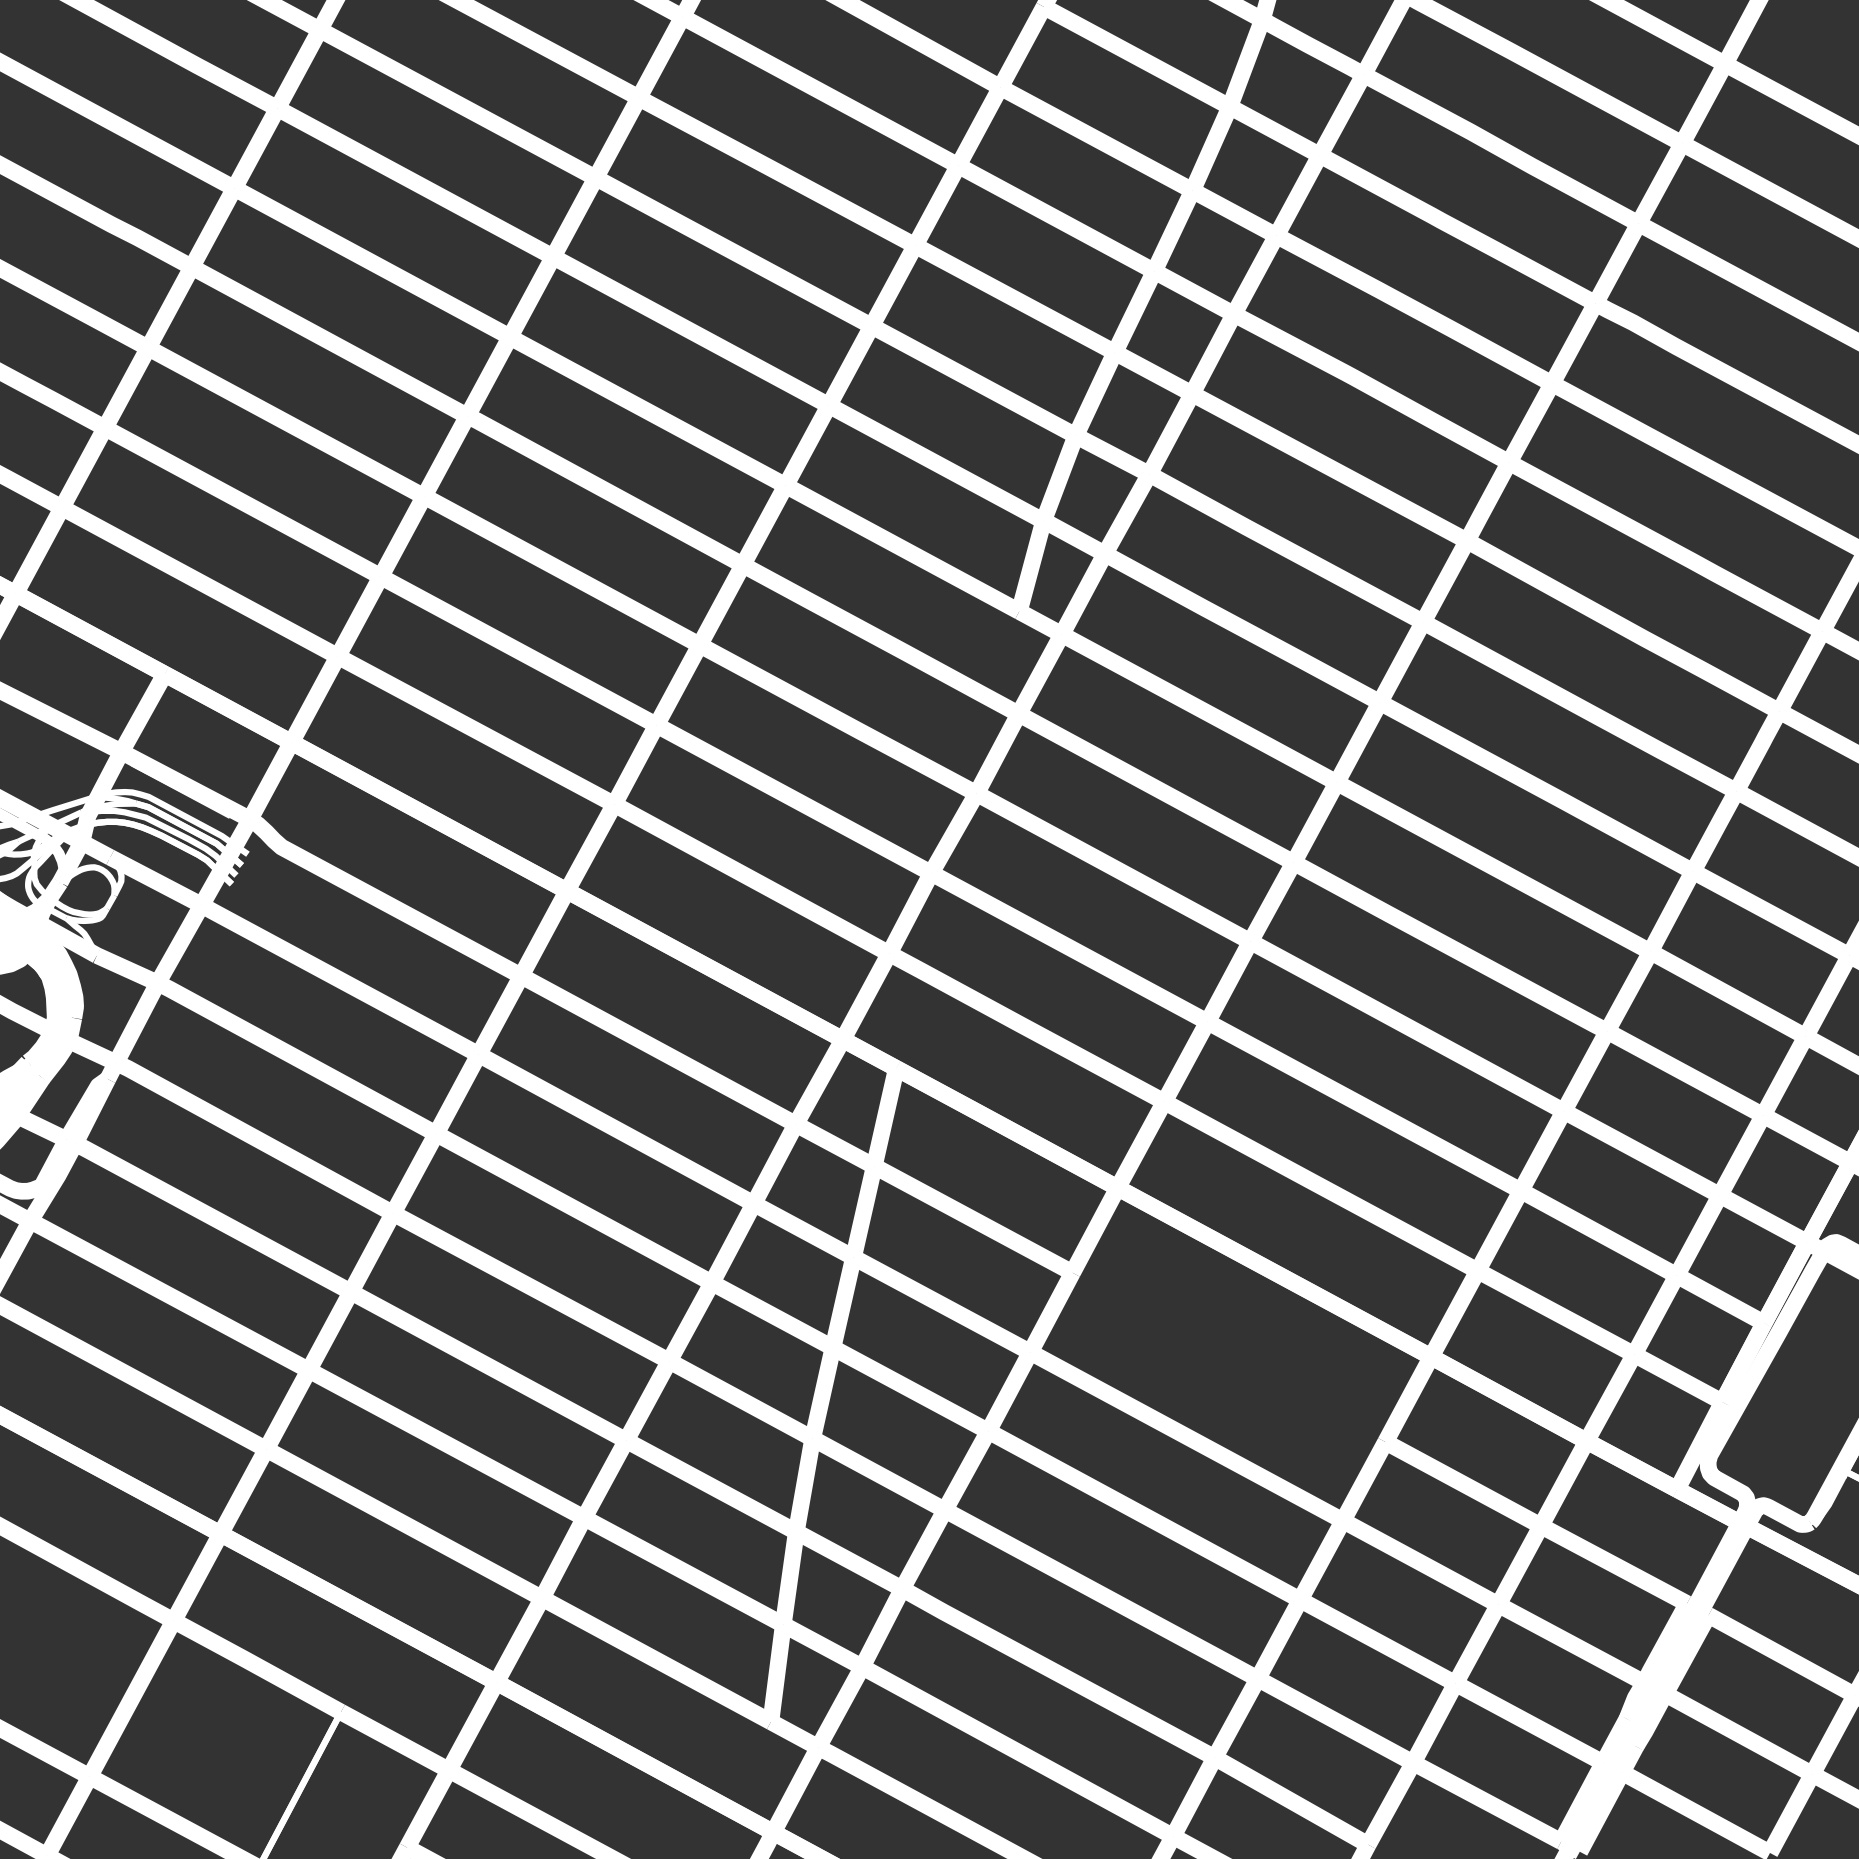

In [10]:
filename = great_streets('Times Square, New York, NY, USA')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

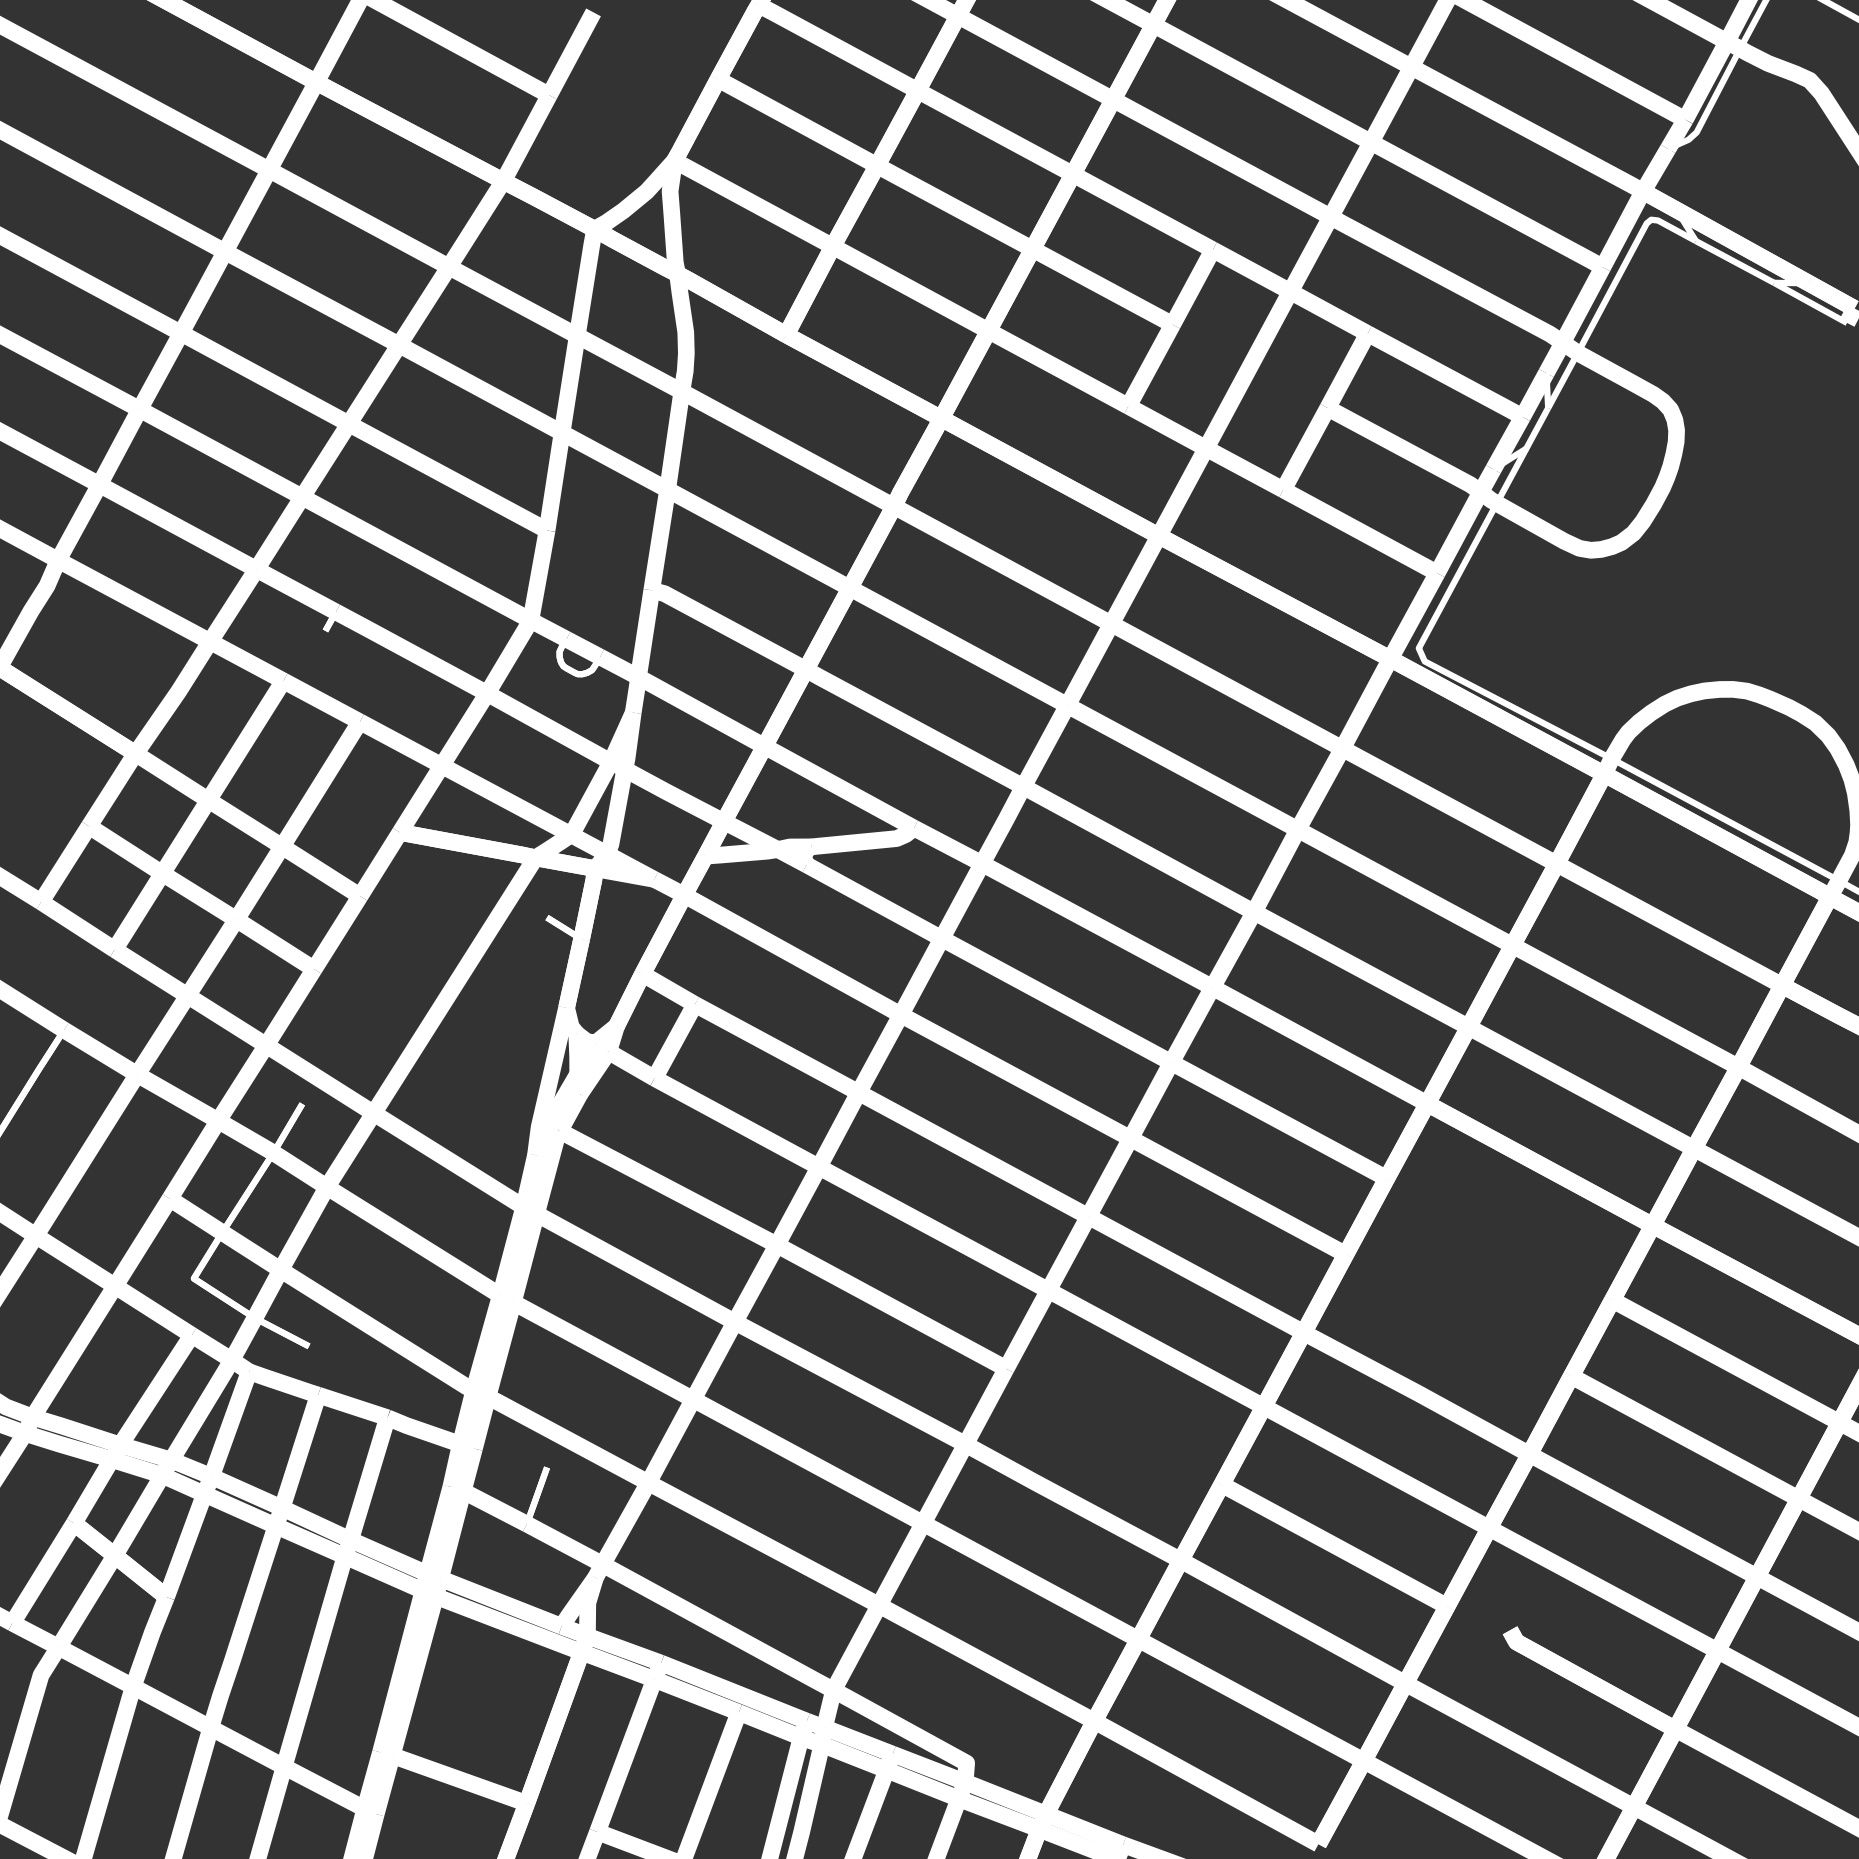

In [11]:
filename = great_streets('East Village, New York, NY, USA')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)

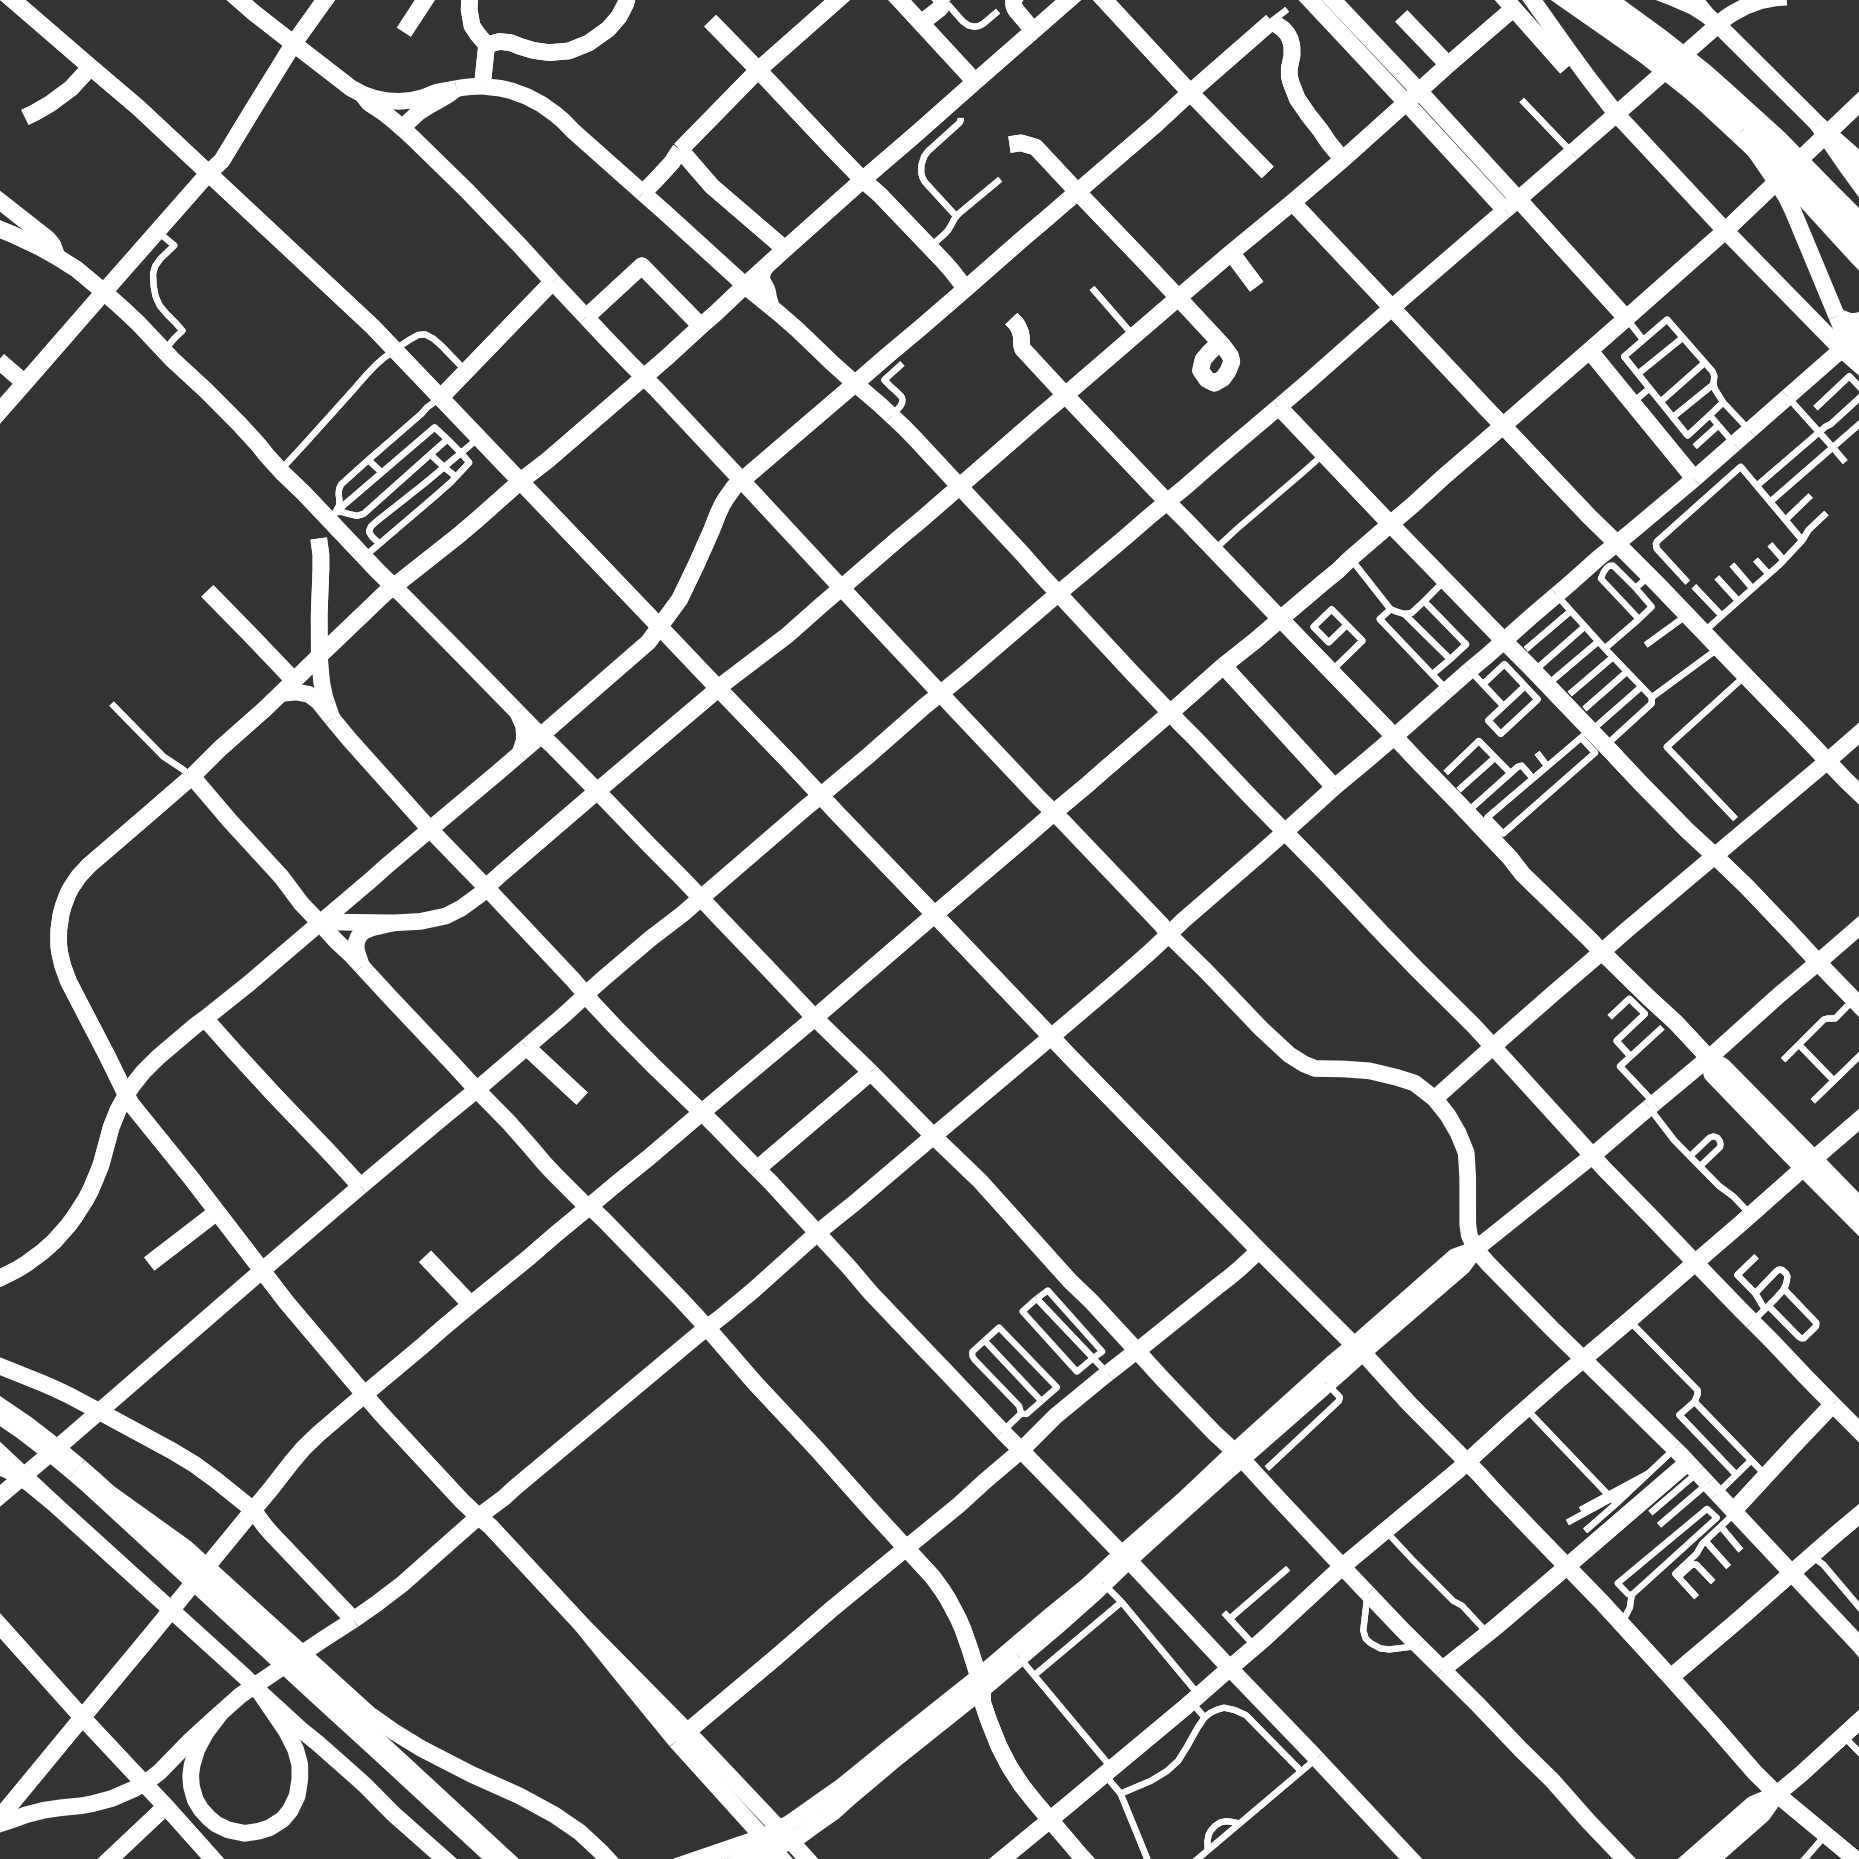

In [12]:
filename = great_streets('Charlotte, North Carolina, USA')
Image('{}/{}.jpg'.format(img_folder, filename), height=size, width=size)